In [4]:
import joblib 

model=joblib.load('random_forest_model_linux.joblib')

In [5]:
def calculate_statistics(df):
    grouped = df.groupby('id')['values'].apply(list)
    stats = grouped.apply(lambda x: pd.Series({
        'mean': np.nanmean(x),  # Вычисляем среднее, игнорируя NaN
        'std': np.nanstd(x),    # Вычисляем стандартное отклонение, игнорируя NaN
        'min': np.nanmin(x),     # Минимум
        'max': np.nanmax(x)      # Максимум
    }))
    return stats

def impute_nan_with_median(table):
    for col in table.columns:
        if table[col].dtype in ['float64', 'int64']:  # Проверяем, что столбец числовой
            table[col] = table[col].fillna(table[col].median())
    return table

In [7]:
import pandas as pd 
filename=str(input())
df_test=pd.read_parquet(filename)

 test.parquet


In [9]:
import numpy as np 

stats_df_test = calculate_statistics(df_test)
stats_df_test.reset_index(inplace=True)

table_test = impute_nan_with_median(stats_df_test)

feature_columns = ['mean', 'std']
x_test = table_test[feature_columns]

predictions=model.predict_proba(x_test)

/tmp/ipykernel_4255/3710964254.py:4: RuntimeWarning: Mean of empty slice
  'mean': np.nanmean(x),  # Вычисляем среднее, игнорируя NaN
/home/timofey/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_4255/3710964254.py:6: RuntimeWarning: All-NaN axis encountered
  'min': np.nanmin(x),     # Минимум
/tmp/ipykernel_4255/3710964254.py:7: RuntimeWarning: All-NaN axis encountered
  'max': np.nanmax(x)      # Максимум


In [10]:
predictions[:,0].mean()

0.7229944660803203

   id  predicted_pos_probability
0   2                   0.220077
1   6                   0.618528
2   7                   0.986317
3  13                   0.808891
4  17                   0.981170


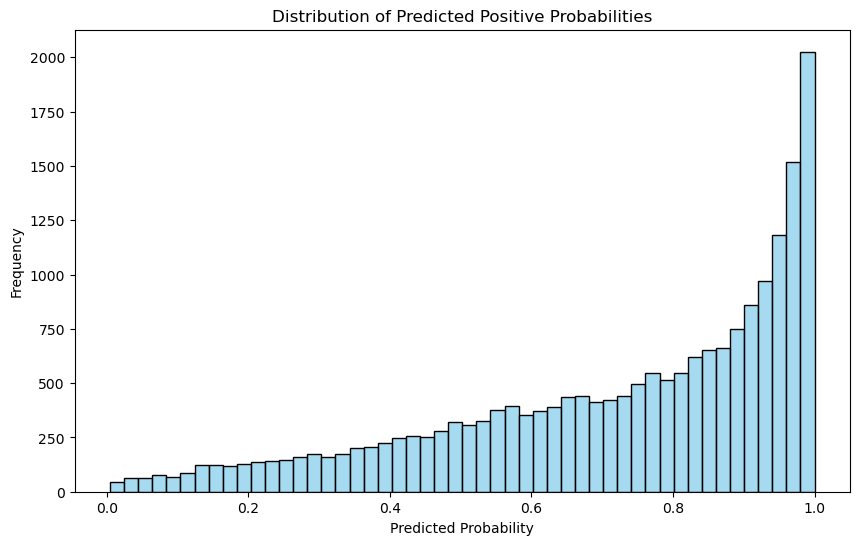

          id     score
0          2  0.779923
1          6  0.381472
2          7  0.013683
3         13  0.191109
4         17  0.018830
...      ...       ...
19995  99965  0.894076
19996  99975  0.102290
19997  99980  0.367760
19998  99981  0.757073
19999  99985  0.151626

[20000 rows x 2 columns]


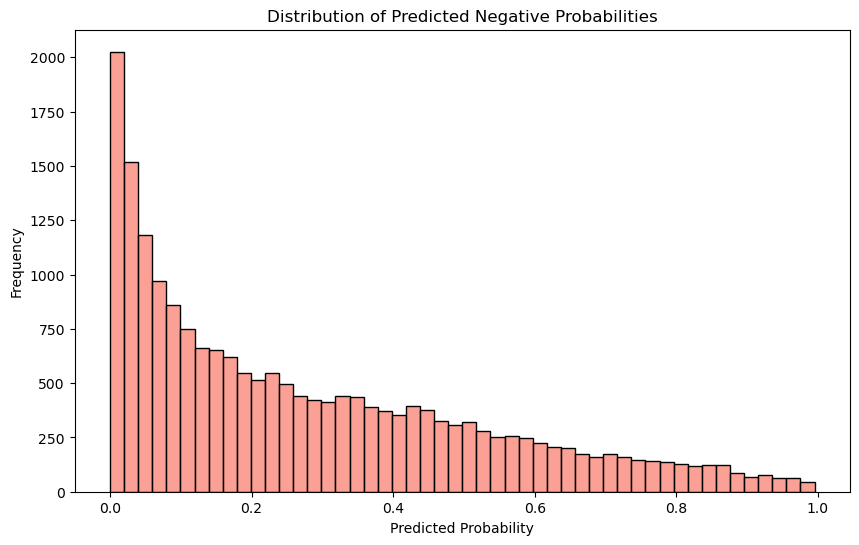

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

positive_probabilities = predictions[:,0]
negative_probabilities = predictions[:,1]

pos_results_df = pd.DataFrame({
    'id': table_test['id'],  # Предполагается, что id есть в table_test
    'predicted_pos_probability': positive_probabilities
})

neg_results_df=pd.DataFrame({
    'id': table_test['id'],
    'score': negative_probabilities
})

# 7. Вывод первых 5 строк результата
print(pos_results_df.head())

# 8. Дополнительно, можно визуализировать распределение вероятностей
plt.figure(figsize=(10,6))
sns.histplot(data=pos_results_df,x='predicted_pos_probability',bins=50,color = 'skyblue')
plt.title('Distribution of Predicted Positive Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

print(neg_results_df)

plt.figure(figsize=(10,6))
sns.histplot(data=neg_results_df,x='score',bins = 50, color = 'salmon')
plt.title('Distribution of Predicted Negative Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [14]:
neg_results_df.to_csv('submission.csv', index = False)